In [ ]:
# 🔹 2. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [ ]:
# Load the dataset
df = pd.read_csv('/content/jabalpur_house_prices_mlp.csv')
df.head(50)


,Location,BHK,Bathrooms,Size_sqft,Property_Type,Floor,Total_Floors,Property_Age,Parking,Lift,Security,Furnished,Price_Lakhs
0,Napier Town,4,4,2619,Apartment,7,10,5,No,No,Yes,Furnished,126.10
1,Damohnaka,4,3,2025,Villa,0,1,0,No,No,Yes,Unfurnished,66.14
2,Kachhpura,4,4,1045,Independent House,0,1,2,Yes,No,Yes,Furnished,36.41
3,Sneh Nagar,1,1,1573,Apartment,2,10,12,No,Yes,No,Furnished,49.53
4,Wright Town,2,2,2254,Apartment,8,9,3,Yes,No,Yes,Furnished,72.80
5,Ranital,5,5,1402,Apartment,1,3,20,No,No,Yes,Furnished,48.23
6,Ranital,1,1,2421,Independent House,0,1,4,Yes,No,No,Semi,90.62
7,Civil Lines,5,4,2067,Apartment,3,4,2,No,No,No,Semi,67.32
8,Sukha,3,3,2813,Independent House,0,1,4,Yes,No,Yes,Furnished,119.61
9,Sneh Nagar,5,4,1424,Independent House,0,1,14,Yes,No,No,Semi,51.22


In [ ]:


# Encode categorical columns
categorical_cols = ['Location', 'Property_Type', 'Parking', 'Lift', 'Security', 'Furnished']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
# 🔹 4. Split Data
X = df.drop("Price_Lakhs", axis=1)
y = df["Price_Lakhs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 🔹 5. Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
# 🔹 6. Evaluate Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔍 Random Forest Results")
print("Mean Squared Error (MSE):", round(mse, 2))
print("R² Score:", round(r2, 2))

# Overfitting check
print("Train R²:", round(model.score(X_train, y_train), 2))
print("Test R² :", round(model.score(X_test, y_test), 2))


🔍 Random Forest Results
Mean Squared Error (MSE): 119.96
R² Score: 0.85
Train R²: 0.97
Test R² : 0.85


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


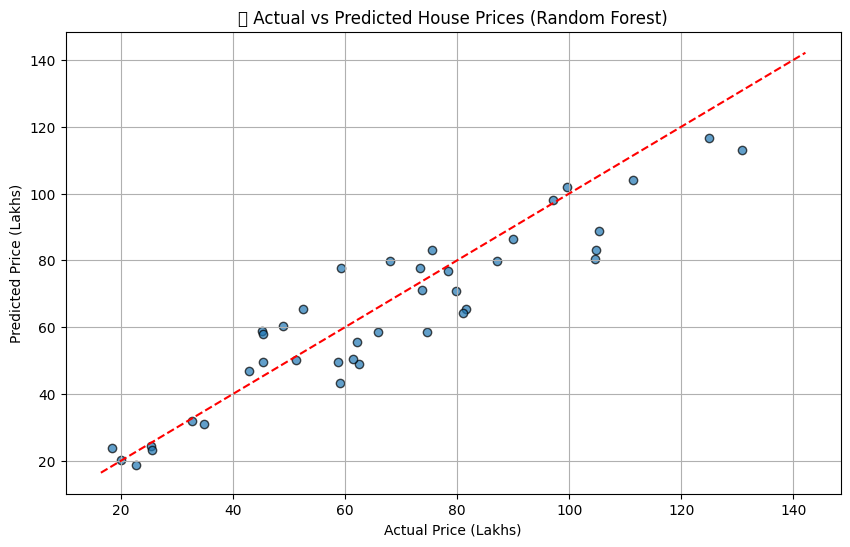

In [ ]:
# 🔹 7. Plot Actual vs Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, edgecolors='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price (Lakhs)')
plt.ylabel('Predicted Price (Lakhs)')
plt.title('📈 Actual vs Predicted House Prices (Random Forest)')
plt.grid(True)
plt.show()


In [ ]:
# Create your custom input
input_data = {
    'Location': label_encoders['Location'].transform(['Napier Town'])[0] if 'Napier Town' in label_encoders['Location'].classes_ else -1, # Check if 'Civil Lines' is in the encoder's classes
    'BHK': 3,
    'Bathrooms': 2,
    'Size_sqft': 2000,
    'Property_Type': label_encoders['Property_Type'].transform(['Apartment'])[0] if 'Apartment' in label_encoders['Property_Type'].classes_ else -1, # Check if 'Apartment' is in the encoder's classes
    'Floor': 2,
    'Total_Floors': 3,
    'Property_Age': 5,
    'Parking': label_encoders['Parking'].transform(['Yes'])[0] if 'Yes' in label_encoders['Parking'].classes_ else -1, # Check if 'Yes' is in the encoder's classes
    'Lift': label_encoders['Lift'].transform(['Yes'])[0] if 'Yes' in label_encoders['Lift'].classes_ else -1, # Check if 'Yes' is in the encoder's classes
    'Security': label_encoders['Security'].transform(['Yes'])[0] if 'Yes' in label_encoders['Security'].classes_ else -1, # Check if 'Yes' is in the encoder's classes
    'Furnished': label_encoders['Furnished'].transform(['Semi'])[0] if 'Semi' in label_encoders['Furnished'].classes_ else -1, # Check if 'Semi' is in the encoder's classes
}

# Convert to DataFrame
input_df = pd.DataFrame([input_data])

In [ ]:
predicted_price = model.predict(input_df)[0]
print(f"💰 Predicted House Price: ₹{predicted_price:.2f} Lakhs")


💰 Predicted House Price: ₹85.40 Lakhs


In [ ]:
!pip install streamlit pyngrok --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load the dataset
# Assuming your dataset is in 'jabalpur_house_prices_mlp.csv'
df = pd.read_csv('/content/jabalpur_house_prices_mlp.csv')

# Encode categorical columns
categorical_cols = ['Location', 'Property_Type', 'Parking', 'Lift', 'Security', 'Furnished']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Apply Label Encoding to the DataFrame
    label_encoders[col] = le

# Now you can use df
X = df.drop('Price_Lakhs', axis=1)
y = df['Price_Lakhs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Fit the model using the encoded data

RandomForestRegressor(random_state=42)

In [ ]:
import joblib

# Save the model and encoders
joblib.dump(model, 'house_price_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load model and encoders
model = joblib.load('house_price_model.pkl')
label_encoders = joblib.load('label_encoders.pkl')

st.title("🏠 Jabalpur House Price Predictor")

# Input form
location = st.selectbox("Location", label_encoders['Location'].classes_)
bhk = st.number_input("BHK", min_value=1, max_value=10, value=3)
bathrooms = st.number_input("Bathrooms", min_value=1, max_value=10, value=2)
size = st.number_input("Size (sqft)", min_value=100, max_value=10000, value=1400)
property_type = st.selectbox("Property Type", label_encoders['Property_Type'].classes_)
floor = st.number_input("Floor", 0, 30, 2)
total_floors = st.number_input("Total Floors", 1, 50, 5)
property_age = st.number_input("Property Age", 0, 100, 5)
parking = st.selectbox("Parking", label_encoders['Parking'].classes_)
lift = st.selectbox("Lift", label_encoders['Lift'].classes_)
security = st.selectbox("Security", label_encoders['Security'].classes_)
furnished = st.selectbox("Furnished", label_encoders['Furnished'].classes_)

if st.button("Predict Price"):
    input_dict = {
        'Location': label_encoders['Location'].transform([location])[0],
        'BHK': bhk,
        'Bathrooms': bathrooms,
        'Size_sqft': size,
        'Property_Type': label_encoders['Property_Type'].transform([property_type])[0],
        'Floor': floor,
        'Total_Floors': total_floors,
        'Property_Age': property_age,
        'Parking': label_encoders['Parking'].transform([parking])[0],
        'Lift': label_encoders['Lift'].transform([lift])[0],
        'Security': label_encoders['Security'].transform([security])[0],
        'Furnished': label_encoders['Furnished'].transform([furnished])[0],
    }

    input_df = pd.DataFrame([input_dict])
    predicted_price = model.predict(input_df)[0]
    st.success(f"Estimated Price: ₹{predicted_price:.2f} Lakhs")


Writing app.py


In [ ]:
from pyngrok import ngrok

# Remove any leading or trailing spaces from the auth token
ngrok.set_auth_token("2w03bWA9On3S1K3vHydDmeUI8Vk_5vPBs7fa58FUnLjmW5oTb".strip())  # Strip leading/trailing spaces

In [ ]:
# Kill any previous processes
!pkill streamlit

# Open tunnel again
# Include port in 'addr' for HTTPv2Tunnel configuration
public_url = ngrok.connect(addr='8501')
print(f"🔗 Your Streamlit app is live at: {public_url}")

# Launch the app
!streamlit run app.py &

🔗 Your Streamlit app is live at: NgrokTunnel: "https://505c-34-125-78-137.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.78.137:8501

